# Ames - Housing Prices

I denne notebooken bruker vi plotly med seaborn og matplotlib for visualisering og maskinlæringsalgoritmer for å forutse husprisene i Ames. 

**Deltakere:** Simen Østensen og Sebastian Berge


## Innhold
1. [Import av pakker og data](#import)
2. [Visualisering av data](#visualisering)
3. [Håndtering av manglende data](#ma


 ## Import av pakker og data <a name="import"></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

 ## Visualisering av data <a name="visualisering"></a>
 I dette avsnittet går vi nærmere inn i dataene for å få innsyn. Her ser vi også nærmere på korrelasjoner mellom dataene i datasettet.

In [5]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Refleksjoner:
- train-settet har 81 kolonner, mens test-settet har 80 kolonner
- test-settet har ikke raden SalePrice, så dette vil være vår oppgave å kalulere

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


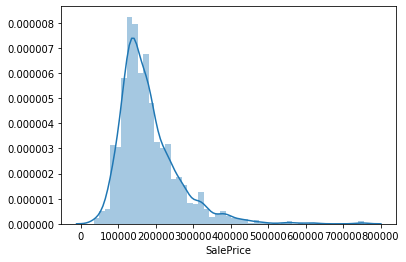

In [9]:
sns.distplot(train['SalePrice'])

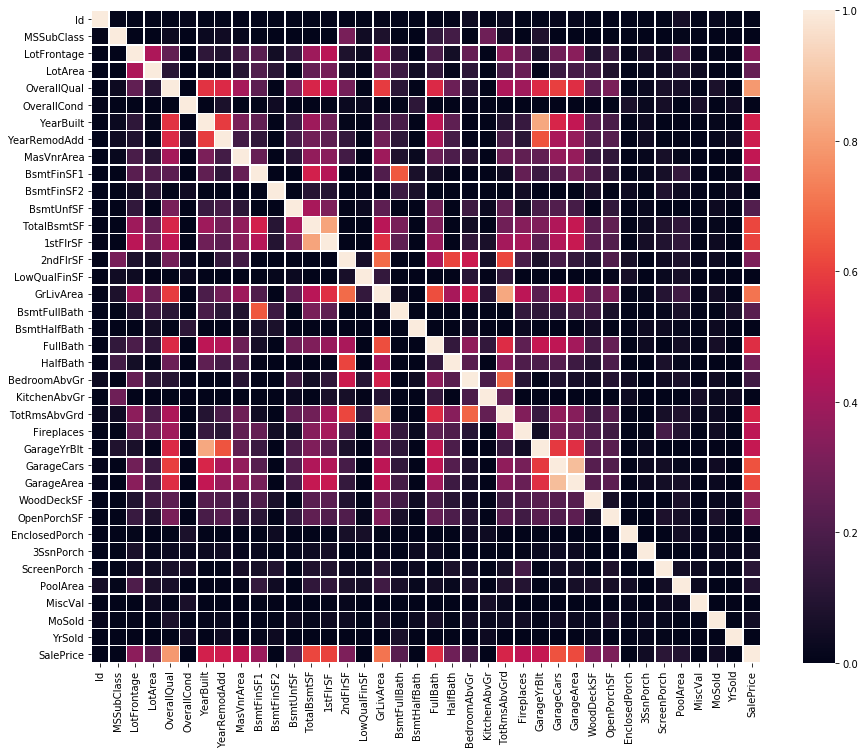

In [10]:
fig, ax = plt.subplots(figsize=(15, 12))
corr = train.corr()
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1)

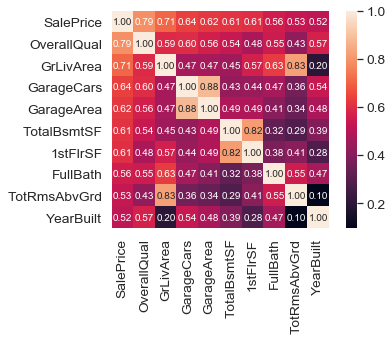

In [11]:
cols = corr.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Figuren viser variablene som korrelerer mest til "SalePrice". Det vi kan se ut i fra figuren er at "OverallQual", "GrLivArea" og "TotalBsmtSF" er sterkt korrelert til "SalePrice". "GarageCars" og "GarageArea" er også sterkt korrelert til hverandre. Grunnen til dette er at har du større garasje har du plass til flere biler. Derfor kan vi forholde oss til en av disse variablene.

Ut i fra dette vil følgende variabler ha en sentral rolle i dette problemet:
- OverallQual
- GarageCars
- YearBuilt
- FullBath
- TotalBsmtSF
- GrLivArea

### Lineære relasjoner
Vi ønsker å se nærmere på de linære relasjonene, og den beste måten å gjøre dette er ved å visualisere den linære relasjonen.

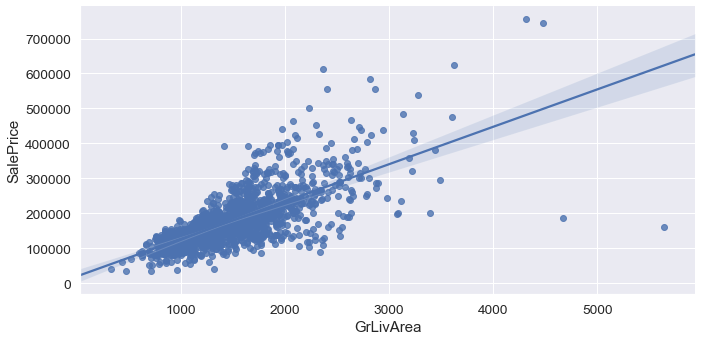

In [12]:
sns.lmplot(x='GrLivArea', y='SalePrice', data=train, aspect= 1* 2)

In [13]:
train.drop(train[train.GrLivArea>4000].index, inplace = True)
train.reset_index(drop = True, inplace = True)

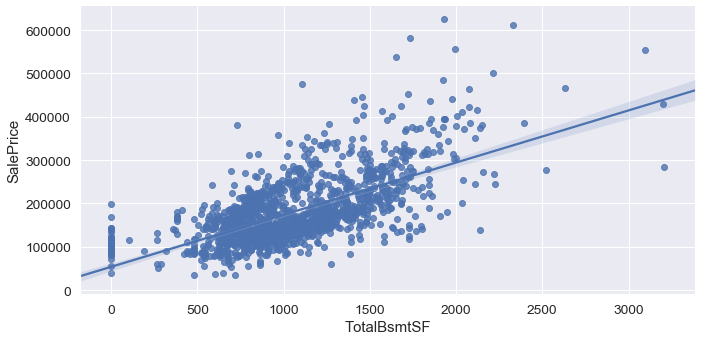

In [14]:
sns.lmplot(x='TotalBsmtSF', y='SalePrice', data=train, aspect=1*2)

In [15]:
train.drop(train[train.TotalBsmtSF>3000].index, inplace = True)
train.reset_index(drop = True, inplace = True)

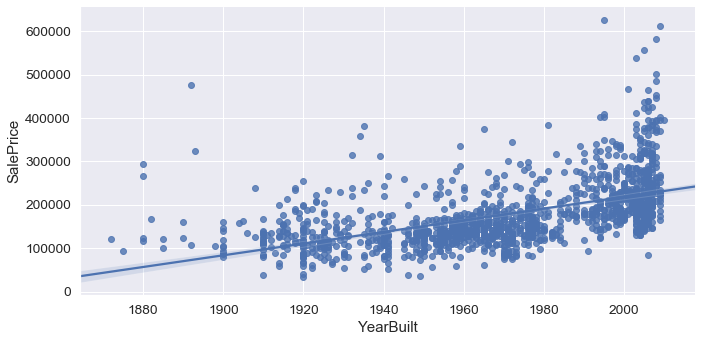

In [16]:
sns.lmplot(x='YearBuilt', y='SalePrice', data=train, aspect=1*2)

In [17]:
train.drop(train[train.YearBuilt<1900].index, inplace = True)
train.reset_index(drop = True, inplace = True)

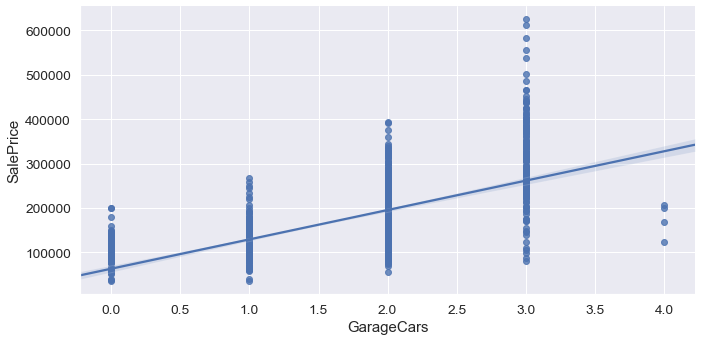

In [18]:
sns.lmplot(x='GarageCars', y='SalePrice', data=train, aspect=1*2)

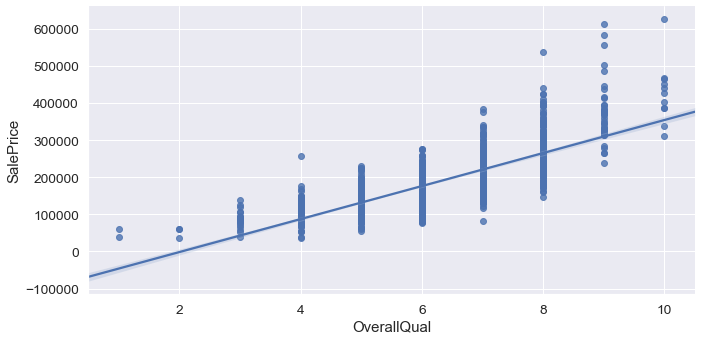

In [19]:
sns.lmplot(x='OverallQual', y='SalePrice', data=train, aspect=1*2)

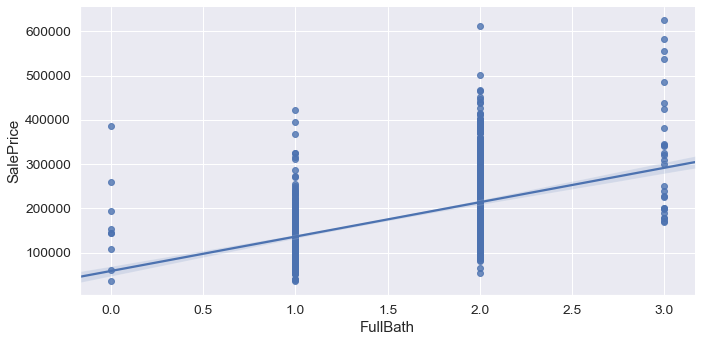

In [20]:
sns.lmplot(x='FullBath', y='SalePrice', data=train, aspect=1*2)

**Refleksjoner:**
- Det vi ser er at 'GrlivArea' og 'TotalBsmtSF' er i lineær relasjon med 'SalePrice'. Begge relasjonene er positiv som betyr at når en variabel øker, så vil den andre også øke. 
- 'OverallQual', 'FullBath' og 'YearBuilt' ser vi også er i relasjon med 'SalePrice'.  Den som skiller seg mest ut i dette tilfellet er 'OverallQual'

## Håndtering av manglende verdier
I dette avsnittet tar vi for oss de manglende verdiene. I første omgang ville det vært lettest og fjerne verdier som nesten bare inneholder NaN (not a number), men vi la merke til at dette også hadde en verdi. De vanligste metodene for å håndtere manglende verdier er mean, median eller mode, avhengig av distribueringen og variablene (kategorisk eller numerisk). For de kategoriske anvender vi mode, mens for de numeriske anvender vi mean. For de verdiene med skjev fordeling, anvender vi meadienen.

(Kanskje skrive noe her om ulemper ved anvendelse av mean, meadian og mode)

In [21]:
y_train = train.SalePrice

train.drop('SalePrice', axis = 1, inplace = True)

df_merged = pd.concat([train, test], axis = 0)

df_merged.shape

(2897, 80)

In [22]:
df_merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = df_merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')

df_merged.dtypes.value_counts()

object     48
int64      21
float64    11
dtype: int64

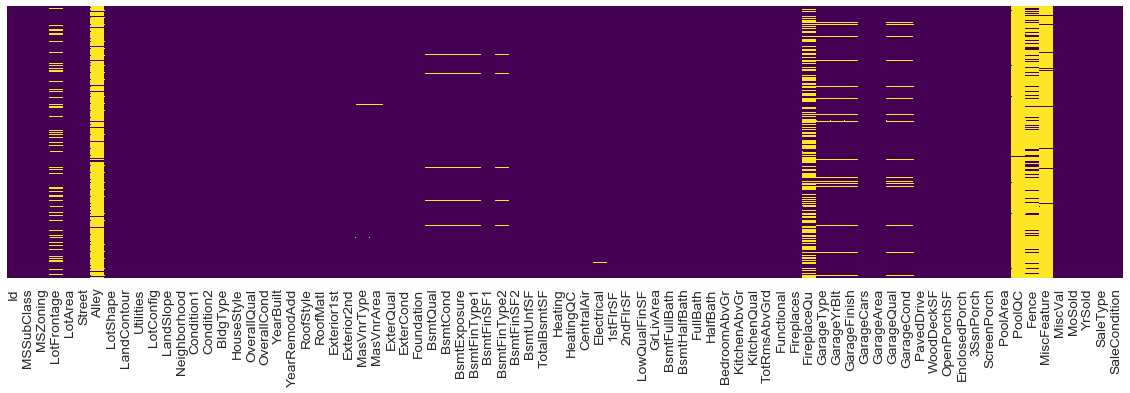

In [23]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [24]:
missing_columns = len(df_merged) - df_merged.loc[:, np.sum(df_merged.isnull())>0].count()

x = missing_columns.index
y = missing_columns

In [25]:
missing_columns

MSZoning           4
LotFrontage      485
Alley           2705
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      79
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1410
GarageType       155
GarageYrBlt      157
GarageFinish     157
GarageCars         1
GarageArea         1
GarageQual       157
GarageCond       157
PoolQC          2889
Fence           2331
MiscFeature     2793
SaleType           1
dtype: int64

Vanligvis pleier man å droppe variabler hvor vi mangler minst 40% av verdiene. 

I dette tilfellet er NaN-verdiene brukt med vilje for å beskrive visse ting, som for eksempel at NaN i Alley betyr No Alley Access.

For å unngå å droppe variabler som kan ha en betydning, gjør vi om NaN til None.

In [26]:
to_impute_by_none = df_merged.loc[:, ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']]
for i in to_impute_by_none.columns:
    df_merged[i].fillna('None', inplace = True)

In [27]:
to_impute_by_mode =  df_merged.loc[:, ['Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional', 'SaleType']]
for i in to_impute_by_mode.columns:
    df_merged[i].fillna(df_merged[i].mode()[0], inplace = True)

In [28]:
to_impute_by_median = df_merged.loc[:, ['BsmtFullBath','BsmtHalfBath', 'GarageCars', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']]
for i in to_impute_by_median.columns:
    df_merged[i].fillna(df_merged[i].median(), inplace = True)

In [29]:
df = df_merged.drop(columns=['Id','LotFrontage'], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform) # data is converted.
df.head(2)

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,617,1,1,3,3,0,4,0,...,0,0,3,4,1,0,1,2,8,4
1,0,3,892,1,1,3,3,0,2,0,...,0,0,3,4,1,0,4,1,8,4


In [30]:
df['LotFrontage'] = df_merged['LotFrontage']

df = df.set_index('LotFrontage').reset_index()
df.head(2)

,LotFrontage,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,65.0,5,3,617,1,1,3,3,0,4,...,0,0,3,4,1,0,1,2,8,4
1,80.0,0,3,892,1,1,3,3,0,2,...,0,0,3,4,1,0,4,1,8,4


In [31]:
corr = df.corr()

display(corr['LotFrontage'].sort_values(ascending = False)[:5])
display(corr['LotFrontage'].sort_values(ascending = False)[-5:])

LotFrontage    1.000000
LotArea        0.639965
1stFlrSF       0.420257
GarageArea     0.360497
GrLivArea      0.347875
Name: LotFrontage, dtype: float64

LotConfig    -0.191054
GarageType   -0.295651
MSSubClass   -0.398100
BldgType     -0.486039
Utilities          NaN
Name: LotFrontage, dtype: float64

Vi ser at BldgType har den høyeste korrelasjonen med LotFrontage.

In [32]:
df_merged['LotFrontage'] = df_merged.groupby(['BldgType'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [33]:
print('Manglende verdier som ikke er behandlet: ', df_merged.columns[df_merged.isna().any()].values)

Manglende verdier som ikke er behandlet:  []


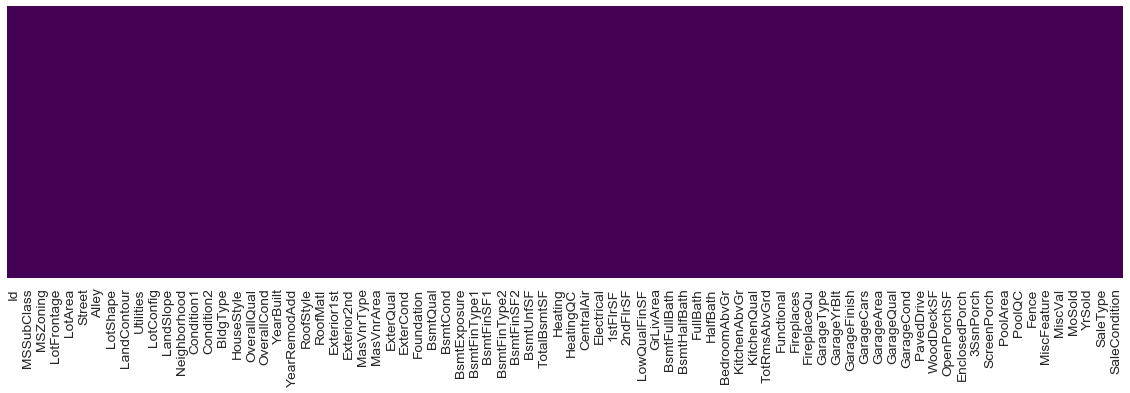

In [34]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(df_merged.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Normalitet og transformasjon av distribusjoner

Normal distribusjon av variabler er ikke bare en av forutsetningene for regresjonsproblemer, men også en antagelse om parametrisk test og pearsons korrelasjon. I praksis kan ikke dette oppfylles perfekt og derfor er noe avvik fra denne antakelsen akseptabelt. Videre skal vi prøve å gjøre den skeive fordelingen så normal som mulig. Siden de fleste av variablene er positivt skjevt, skal vi bruke loggtransformasjon på dem. La oss observere målvariabelen hver for seg:

Hvis skeivhet er 0, er dataene perfekt symmetriske, selv om det er ganske usannsynlig for data fra den virkelige verden. Som en generell tommelfingerregel:

Hvis skeivheten er mindre enn -1 eller større enn 1, er fordelingen svært skjev. Hvis skeivheten er mellom -1 og -0,5 eller mellom 0,5 og 1, er fordelingen moderat skjev. Hvis skeivheten er mellom -0,5 og 0,5, er fordelingen omtrent symmetrisk.

In [35]:
print("Skeivhet: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

Skeivhet: 1.529700
Kurtosis: 3.801796


(array([ 96., 530., 443., 210.,  93.,  37.,  19.,   5.,   2.,   3.]),
 array([ 34900.,  93910., 152920., 211930., 270940., 329950., 388960.,
        447970., 506980., 565990., 625000.]),
 <a list of 10 Patch objects>)

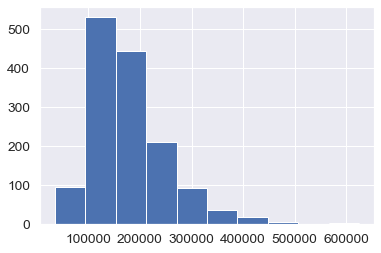

In [36]:
plt.hist(y_train)

(array([ 2.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  1.,  4.,  2.,
         4.,  1.,  3.,  7., 17., 21., 17., 13., 21., 17., 48., 36., 49.,
        55., 78., 97., 81., 62., 71., 65., 82., 77., 64., 46., 50., 42.,
        45., 45., 32., 32., 24., 15., 23., 16., 16.,  5., 15.,  9.,  5.,
         5.,  3.,  1.,  1.,  1.,  1.,  1.,  2.]),
 array([10.46024211, 10.50832986, 10.5564176 , 10.60450535, 10.6525931 ,
        10.70068084, 10.74876859, 10.79685634, 10.84494408, 10.89303183,
        10.94111958, 10.98920733, 11.03729507, 11.08538282, 11.13347057,
        11.18155831, 11.22964606, 11.27773381, 11.32582155, 11.3739093 ,
        11.42199705, 11.4700848 , 11.51817254, 11.56626029, 11.61434804,
        11.66243578, 11.71052353, 11.75861128, 11.80669902, 11.85478677,
        11.90287452, 11.95096227, 11.99905001, 12.04713776, 12.09522551,
        12.14331325, 12.191401  , 12.23948875, 12.28757649, 12.33566424,
        12.38375199, 12.43183974, 12.47992748, 12.52801523, 12.57610298,
 

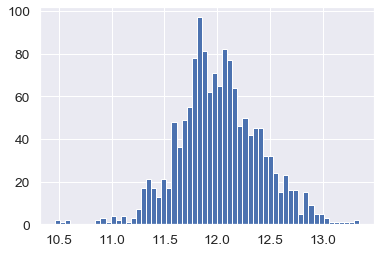

In [37]:
y_train = np.log(y_train)
plt.hist(y_train, bins=60)

Nå kan vi kalkulere resten av de forklarende variablene.

In [38]:
skew_num = pd.DataFrame(data = df_merged.select_dtypes(include = ['int64', 'float64']).skew(), columns=['Skewness'])

skew_num_sorted = skew_num.sort_values(ascending = False, by = 'Skewness')
skew_num_sorted

,Skewness
MiscVal,21.881799
PoolArea,18.653165
LotArea,13.135552
LowQualFinSF,12.515094
3SsnPorch,11.338027
KitchenAbvGr,4.250236
BsmtFinSF2,4.153746
EnclosedPorch,4.066188
ScreenPorch,3.930502
BsmtHalfBath,3.930474


In [39]:
df_merged_num = df_merged.select_dtypes(include = ['int64', 'float64'])

In [40]:
df_merged_skewed = np.log1p(df_merged_num[df_merged_num.skew()[df_merged_num.skew() > 0.5].index])


#Normal variables
df_merged_normal = df_merged_num[df_merged_num.skew()[df_merged_num.skew() < 0.5].index]
    
#Merging
df_merged_num_all = pd.concat([df_merged_skewed, df_merged_normal], axis = 1)

In [41]:
df_merged_num.update(df_merged_num_all)

/Users/sebastianberge/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


## Feature Engineering

### Feature Scaling

I sklearn har vi flere metoder som for eksempel MinMaxScaler, minmax_scale, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer etc.

Funksjonskalering hjelper gradient-nedstigning til å konvergere raskere og reduserer treningstiden. Det er ikke nødvendig å standardisere mål-variabelen. På grunn av tilstedeværelsen av outliers vil vi imidlertid bruke sklearns RobustScaler siden det ikke påvirkes av outliers.

In [43]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(df_merged_num)

df_merged_num_scaled = scaler.transform(df_merged_num)

In [44]:
df_merged_num_scaled = pd.DataFrame(data = df_merged_num_scaled, columns = df_merged_num.columns, index = df_merged_num.index)

Vi må kode kategoriske variabler for maskinlæringsalgoritmer for å tolke dem. Vi vil bruke label encoding og deretter one hot encoding.

In [45]:
"""Let's extract categorical variables first and convert them into category."""
df_merged_cat = df_merged.select_dtypes(include = ['object']).astype('category')

"""let's begin the tedious process of label encoding of ordinal variable"""
df_merged_cat.LotShape.replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.LandContour.replace(to_replace = ['Low', 'Bnk', 'HLS', 'Lvl'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Utilities.replace(to_replace = ['NoSeWa', 'AllPub'], value = [0, 1], inplace = True)
df_merged_cat.LandSlope.replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
df_merged_cat.ExterQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.ExterCond.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtQual.replace(to_replace = ['None', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtCond.replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtExposure.replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtFinType1.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.BsmtFinType2.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.HeatingQC.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.Electrical.replace(to_replace = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.KitchenQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Functional.replace(to_replace = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.FireplaceQu.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageFinish.replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.GarageQual.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageCond.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.PavedDrive.replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
df_merged_cat.PoolQC.replace(to_replace =  ['None', 'Fa', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Fence.replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)

In [46]:
'''All the encodeded variables have int64 dtype except OverallQual and OverallCond. So convert them back into int64.'''
df_merged_cat.loc[:, ['OverallQual', 'OverallCond']] = df_merged_cat.loc[:, ['OverallQual', 'OverallCond']].astype('int64')

'''Extract label encoded variables'''
df_merged_label_encoded = df_merged_cat.select_dtypes(include = ['int64'])

One hot encodings kategoriske variabler uten iboende rekkefølge vil vli konvertert til numeriske for modellen vår, ved hjelp av pandas get_dummies metoden.

In [47]:
df_merged_one_hot = df_merged_cat.select_dtypes(include=['category'])

df_merged_one_hot = pd.get_dummies(df_merged_one_hot, drop_first=True)

Nå må vi slå sammen one hot encoded og label encoded variablene sammen.

Deretter sluttet vi sammen behandlede kategoriske og numeriske variabler.

In [49]:
df_merged_encoded = pd.concat([df_merged_one_hot, df_merged_label_encoded], axis=1)
df_merged_processed = pd.concat([df_merged_num_scaled, df_merged_encoded], axis=1)

Vi kan nå sjekke dimensjonen av den nye datarammen.

In [50]:
df_merged_processed.shape

(2897, 224)

Nå kan vi hente train- og testdata for modellering. y_train er målvariabellen vår.

In [52]:
'''Vet ikke hvorfor dette ikke fungerer'''
df_train_final = df_merged_processed.iloc[0:1438. :]
df_test_final = df_merged_processed.iloc[1438:, :]

y_train = y_train

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.numeric.Int64Index'> with these indexers [1438.0] of <class 'float'>